## Ridge & Lasso Regression

In [433]:
#Importing libraries.
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# suppress Pandas warnings entirely.
pd.set_option('mode.chained_assignment',None)
# Turn off warnings completely for the Notebook
warnings.filterwarnings('ignore')

In [434]:
# Simulate a sine curve (between 10° and 360°) and added some random noise using
x = np.array([i*np.pi/180 for i in range(10,360,2)])
# Setting seed for reproducibility
np.random.seed(10)
# Define the target/dependent variable as sing(x) of independent variable
y = np.sin(x) + np.random.normal(0,0.15,len(x))
# Create the dataframe using independent and dependent variables
x_dataset = pd.DataFrame(np.column_stack([x]),columns=['x'])
y_dataset = pd.DataFrame(np.column_stack([y]),columns=['y'])

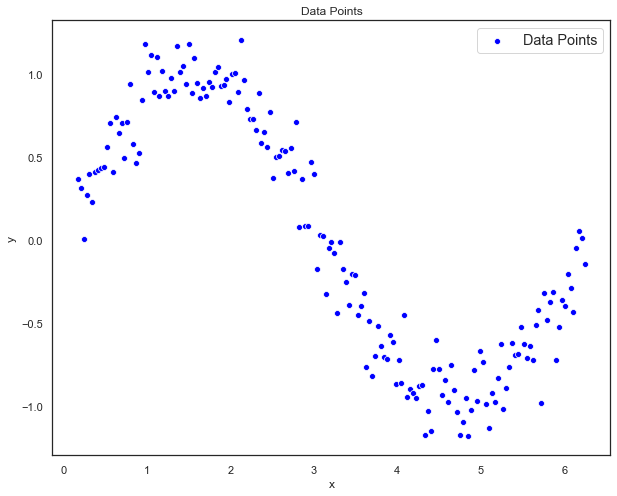

In [373]:
# Visualizing the data points
fig, axs = plt.subplots(figsize=(10, 8), sharex=False, sharey=False)

# Draw the data points
sns.scatterplot(x=x_dataset['x'], y=y_dataset['y'], label='Data Points', color="blue", ax=axs)
axs.set(title='Data Points');
axs.legend(loc='upper right', fontsize='x-large')

In [374]:
# Polynomial Regression, degree=15
from sklearn.preprocessing import PolynomialFeatures

pf15 = PolynomialFeatures(degree=15, include_bias=False)
x_pf15 = pf15.fit_transform(x_dataset)
x_pf15

array([[1.74532925e-01, 3.04617420e-02, 5.31657693e-03, ...,
        1.39445909e-10, 2.43379025e-11, 4.24776531e-12],
       [2.09439510e-01, 4.38649084e-02, 9.18704494e-03, ...,
        1.49197648e-09, 3.12478824e-10, 6.54454118e-11],
       [2.44346095e-01, 5.97050143e-02, 1.45886871e-02, ...,
        1.10680278e-08, 2.70442938e-09, 6.60816760e-10],
       ...,
       [6.17846555e+00, 3.81734366e+01, 2.35853263e+02, ...,
        1.91182521e+10, 1.18121462e+11, 7.29809386e+11],
       [6.21337214e+00, 3.86059933e+01, 2.39873403e+02, ...,
        2.05710165e+10, 1.27815381e+11, 7.94164525e+11],
       [6.24827872e+00, 3.90409870e+01, 2.43938968e+02, ...,
        2.21250940e+10, 1.38243754e+11, 8.63785508e+11]])

In [375]:
# Reclaim our column names
feature_translator = [(f'x{i}', feature) for i, feature in enumerate(x_dataset.columns, 0)]

def translate_feature_names(s):
    for key, val in reversed(feature_translator):
        s = s.replace(key, val)
    return s

poly_features = [
    translate_feature_names(f) for f in pf15.get_feature_names_out()
]

x_pf15n = pd.DataFrame(x_pf15, columns=poly_features)
x_pf15n

,x,x^2,x^3,x^4,x^5,x^6,x^7,x^8,x^9,x^10,x^11,x^12,x^13,x^14,x^15
0,0.17,0.03,0.0053,0.00093,0.00016,2.8e-05,4.9e-06,8.6e-07,1.5e-07,2.6e-08,4.6e-09,8e-10,1.4e-10,2.4e-11,4.2e-12
1,0.21,0.044,0.0092,0.0019,0.0004,8.4e-05,1.8e-05,3.7e-06,7.8e-07,1.6e-07,3.4e-08,7.1e-09,1.5e-09,3.1e-10,6.5e-11
2,0.24,0.06,0.015,0.0036,0.00087,0.00021,5.2e-05,1.3e-05,3.1e-06,7.6e-07,1.9e-07,4.5e-08,1.1e-08,2.7e-09,6.6e-10
3,0.28,0.078,0.022,0.0061,0.0017,0.00047,0.00013,3.7e-05,1e-05,2.9e-06,8.1e-07,2.2e-07,6.3e-08,1.8e-08,4.9e-09
4,0.31,0.099,0.031,0.0097,0.0031,0.00096,0.0003,9.5e-05,3e-05,9.4e-06,2.9e-06,9.2e-07,2.9e-07,9.1e-08,2.9e-08
5,0.35,0.12,0.043,0.015,0.0052,0.0018,0.00063,0.00022,7.7e-05,2.7e-05,9.4e-06,3.3e-06,1.1e-06,4e-07,1.4e-07
6,0.38,0.15,0.057,0.022,0.0083,0.0032,0.0012,0.00047,0.00018,7e-05,2.7e-05,1e-05,3.9e-06,1.5e-06,5.8e-07
7,0.42,0.18,0.073,0.031,0.013,0.0054,0.0023,0.00095,0.0004,0.00017,7e-05,2.9e-05,1.2e-05,5.1e-06,2.1e-06
8,0.45,0.21,0.093,0.042,0.019,0.0087,0.004,0.0018,0.00082,0.00037,0.00017,7.6e-05,3.5e-05,1.6e-05,7.1e-06
9,0.49,0.24,0.12,0.057,0.028,0.014,0.0067,0.0033,0.0016,0.00078,0.00038,0.00019,9.1e-05,4.4e-05,2.2e-05


In [376]:
x_pf15n.shape

(175, 15)

In [377]:
# Splitting the Dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test  = train_test_split(x_pf15n, y_dataset, test_size=0.3)
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [378]:
x_train.shape[0], x_test.shape[0], y_train.shape[0], y_test.shape[0]

(122, 53, 122, 53)

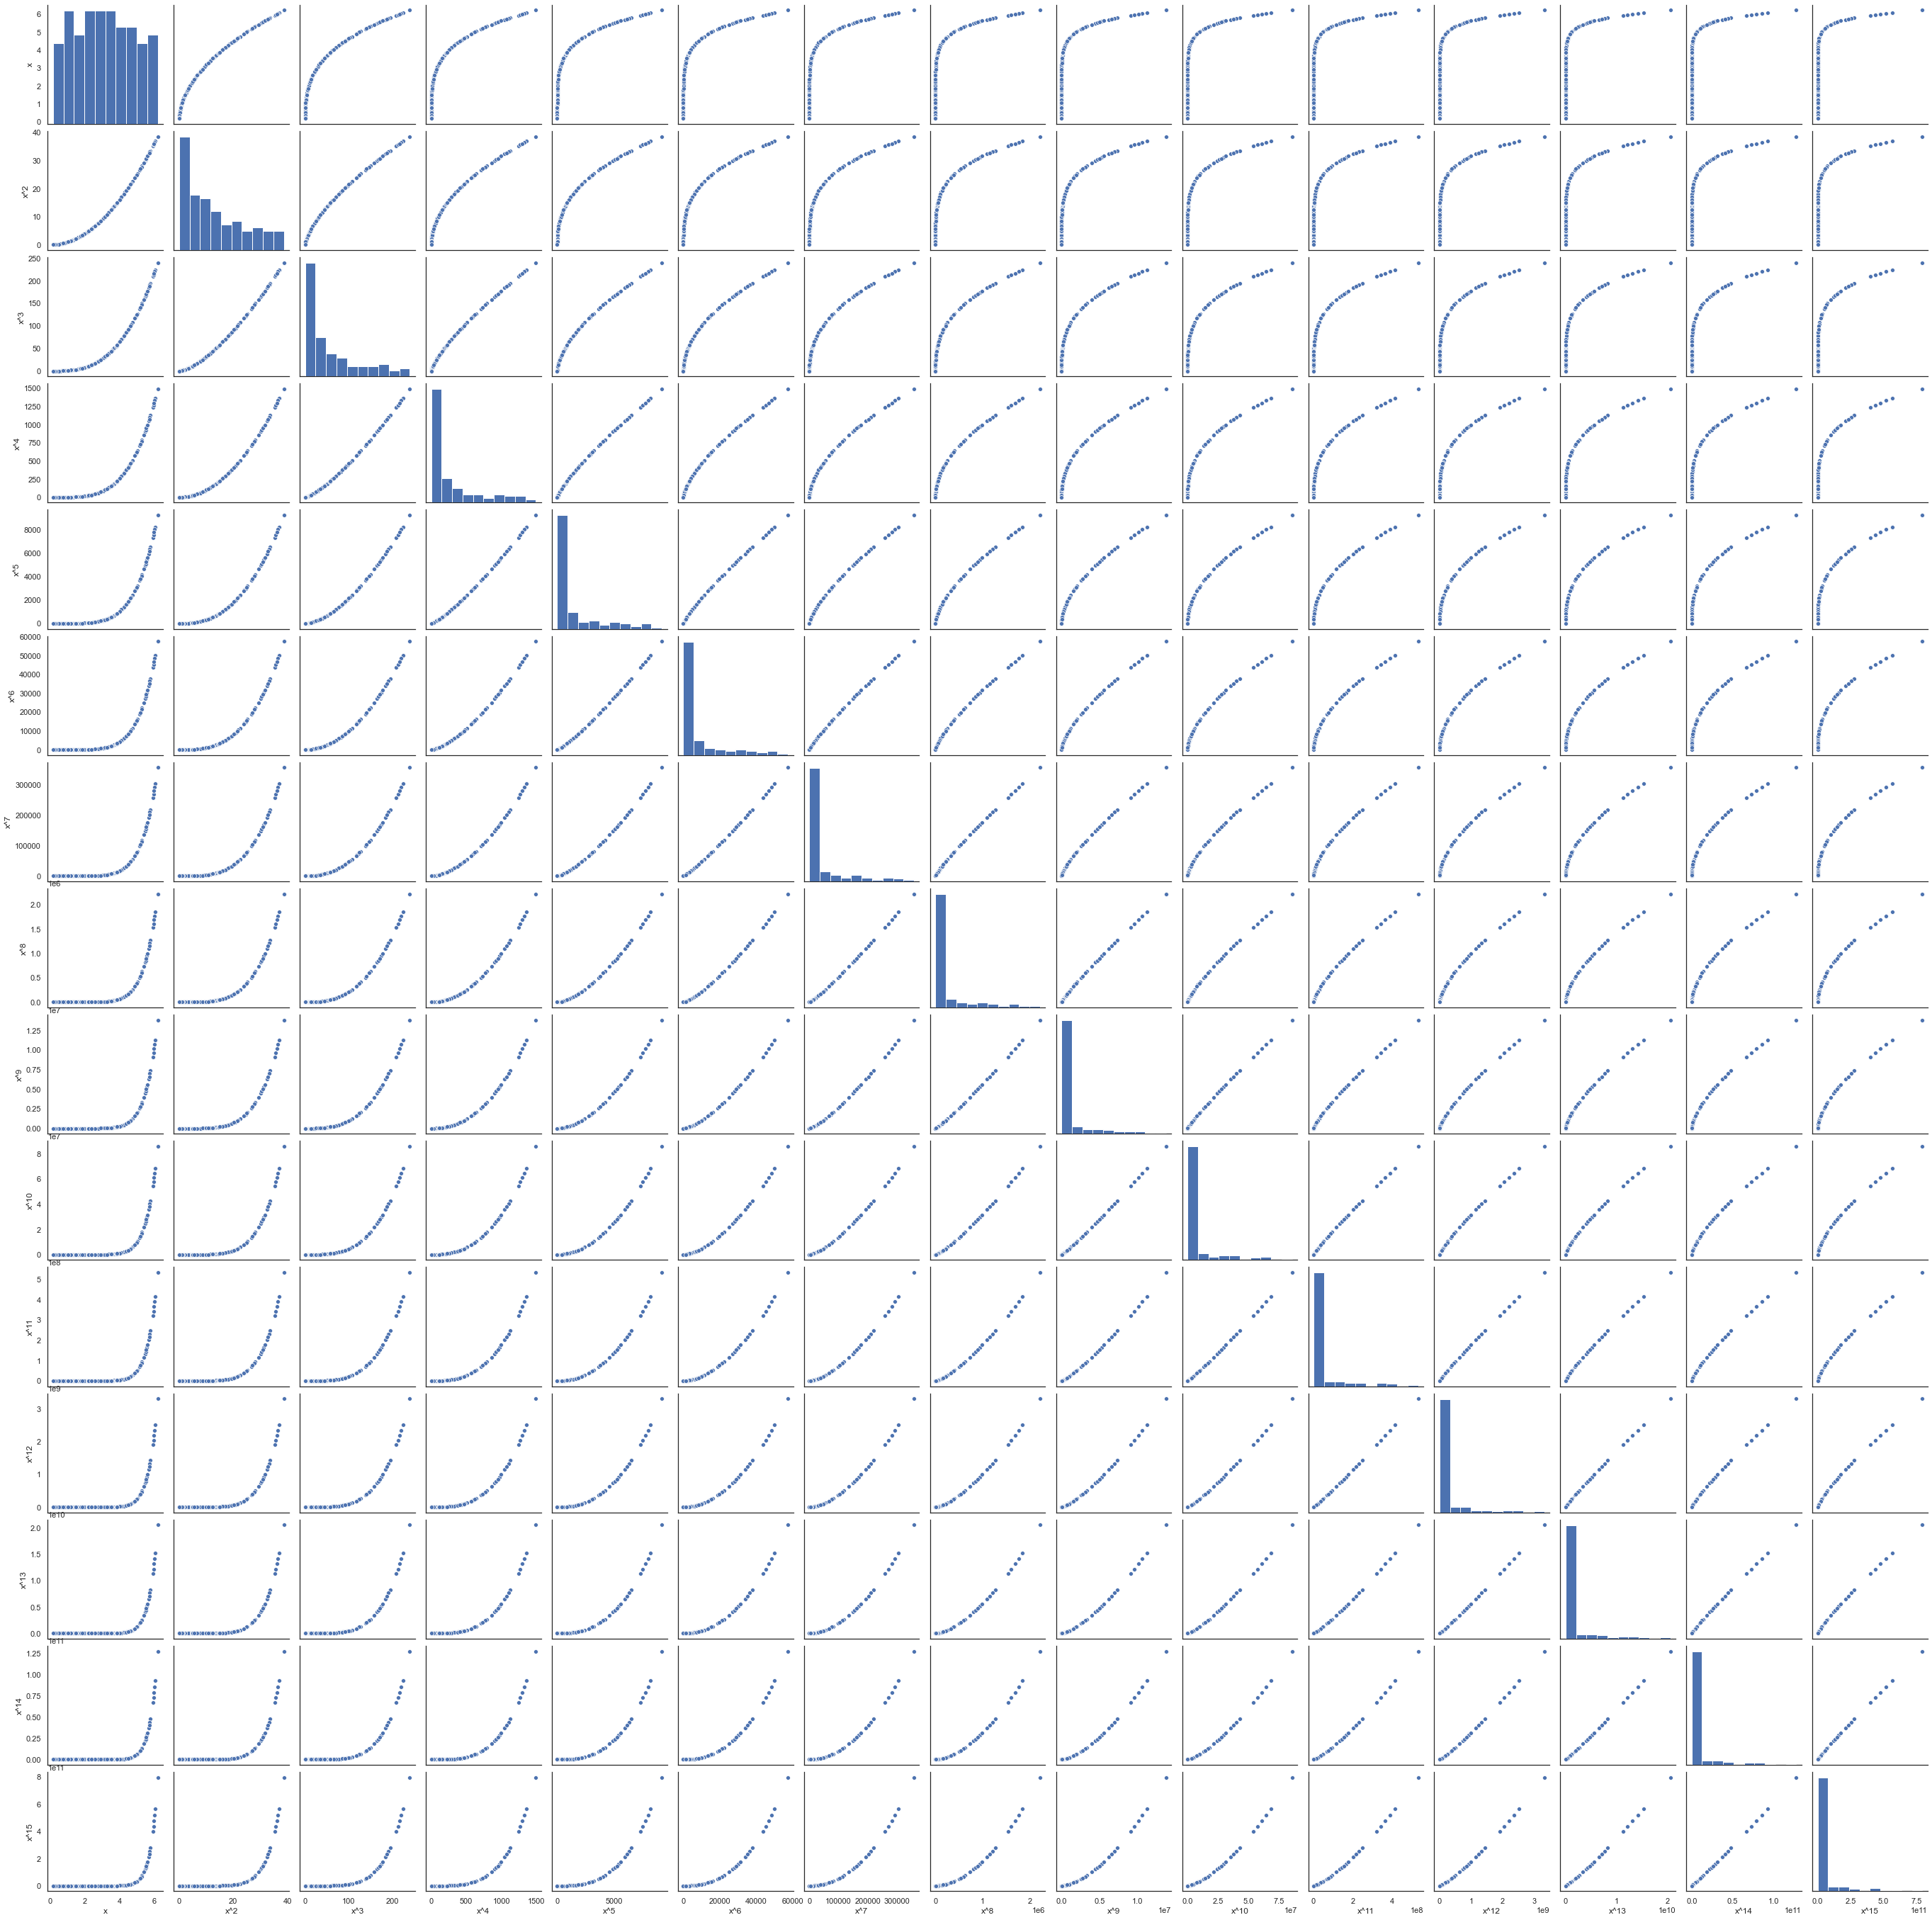

In [379]:
# pairplot
sns.pairplot(x_train)

## Linear Regression

In [380]:
# Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression

def linear_regression(x_features,y_target,power):
    # initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x^%d'%i for i in range(2,power+1)])

    # Fit the model
    slr = LinearRegression()
    slr.fit(x_features[predictors],y_target['y'])
    y_pred = pd.DataFrame()
    y_pred['y'] = slr.predict(x_features[predictors])

    return slr,y_pred

In [381]:
# Visualize Linear Regression result
def visualize_linear_regression(x_features,y_target,y_pred,power,axs):
    # Draw the data points
    sns.scatterplot(x=x_features['x'], y=y_target['y'], label='Y', color="blue", ax=axs)
    # Draw the prediction line
    sns.lineplot(x=x_features['x'], y=y_pred['y'], label='Y Predicted', color="red", ax=axs)
    axs.set(title='Plot for power: %d'%power);
    axs.legend(loc='upper right', fontsize='large')

In [382]:
# Polynomial Liner Regression for a specific power
def linear_regression_power(p_x_train,p_y_train,p_power,axs):

    slr, slr_pred = linear_regression(p_x_train,p_y_train,p_power)
    visualize_linear_regression(x_train_p,p_y_train,slr_pred,p_power,axs)

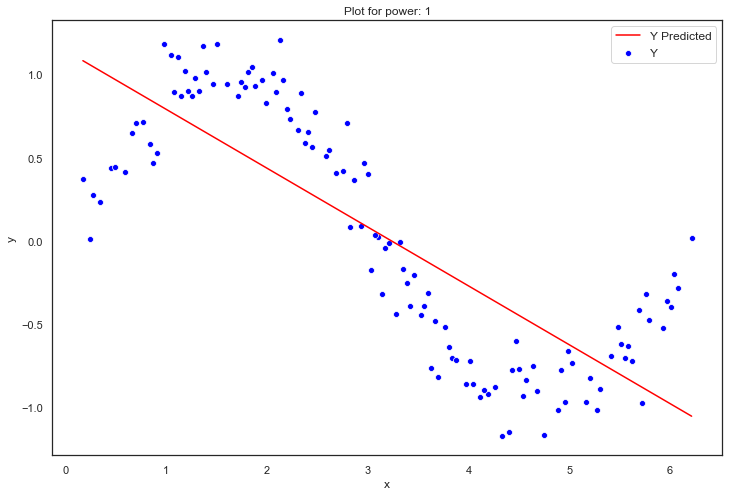

In [383]:
# Polynomial Liner Regression, power =1
fig, axes = plt.subplots(figsize=(12,8), sharex=False, sharey=False)
power =1
x_train_p = x_train.iloc[:,0:power]
linear_regression_power(x_train,y_train,power,axes)

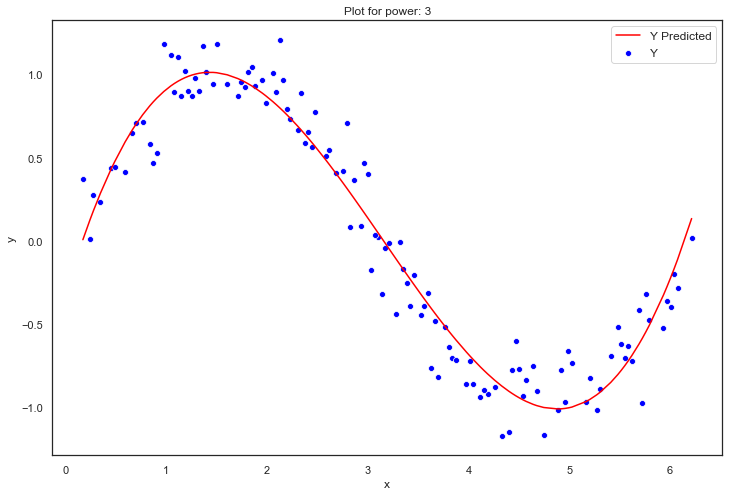

In [384]:
# Polynomial Liner Regression, power =3
fig, axes = plt.subplots(figsize=(12,8), sharex=False, sharey=False)
power =3
x_train_p = x_train.iloc[:,0:power]
linear_regression_power(x_train,y_train,power,axes)

In [385]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def performance_metrics(y_target,y_pred):
    p_metrics = ["{:.5f}".format(r2_score(y_target['y'], y_pred['y'])),
                "{:.5f}".format(mean_absolute_error(y_target['y'], y_pred['y'])),
                "{:.5f}".format(mean_squared_error(y_target['y'], y_pred['y']))]

    return p_metrics

In [386]:
# Initialize a dataframe to store the results:
col = ['r2','mae','mse','intercept'] + ['coef_x^%d'%i for i in range(1,16)]
ind = ['number_of_variable_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)
y_pred_simple = []

In [387]:
# Define the powers for which a plot is required:
# Iterate through all powers and assimilate results
for i in range(1,16):
    itr_x_train = x_train.iloc[:,0:i]
    slr, y_pred = linear_regression(itr_x_train,y_train,i)
    y_pred_simple.append(y_pred)
    coef_matrix_simple.iloc[i-1,0:3] = performance_metrics(y_train,y_pred)
    coef_matrix_simple.iloc[i-1,3:4] =[slr.intercept_]
    coef_matrix_simple.iloc[i-1,4:i+4] =slr.coef_

In [388]:
coef_matrix_simple.head(15)

,r2,mae,mse,intercept,coef_x^1,coef_x^2,coef_x^3,coef_x^4,coef_x^5,coef_x^6,coef_x^7,coef_x^8,coef_x^9,coef_x^10,coef_x^11,coef_x^12,coef_x^13,coef_x^14,coef_x^15
number_of_variable_1,0.64959,0.37853,0.18836,1.1,-0.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_variable_2,0.65127,0.37561,0.18746,1.2,-0.43,0.011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_variable_3,0.94653,0.13087,0.02874,-0.33,2.1,-0.94,0.099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_variable_4,0.94786,0.12760,0.02802,-0.46,2.4,-1.2,0.15,-0.0043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_variable_5,0.95659,0.11735,0.02333,-0.021,0.84,0.42,-0.49,0.11,-0.0071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_variable_6,0.95792,0.11832,0.02262,0.21,-0.24,1.9,-1.4,0.36,-0.042,0.0018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_variable_7,0.95874,0.11641,0.02218,-0.047,1.2,-0.71,0.72,-0.5,0.15,-0.019,0.00095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_variable_8,0.95931,0.11548,0.02187,0.24,-0.71,3.6,-3.6,1.9,-0.61,0.12,-0.012,0.00051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_variable_9,0.95991,0.11495,0.02155,0.64,-3.8,12,-14,9.4,-3.7,0.91,-0.13,0.01,-0.00034,NaN,NaN,NaN,NaN,NaN,NaN
number_of_variable_10,0.95995,0.11477,0.02153,0.78,-5.1,16,-20,15,-6.5,1.8,-0.33,0.036,-0.0022,5.8e-05,NaN,NaN,NaN,NaN,NaN


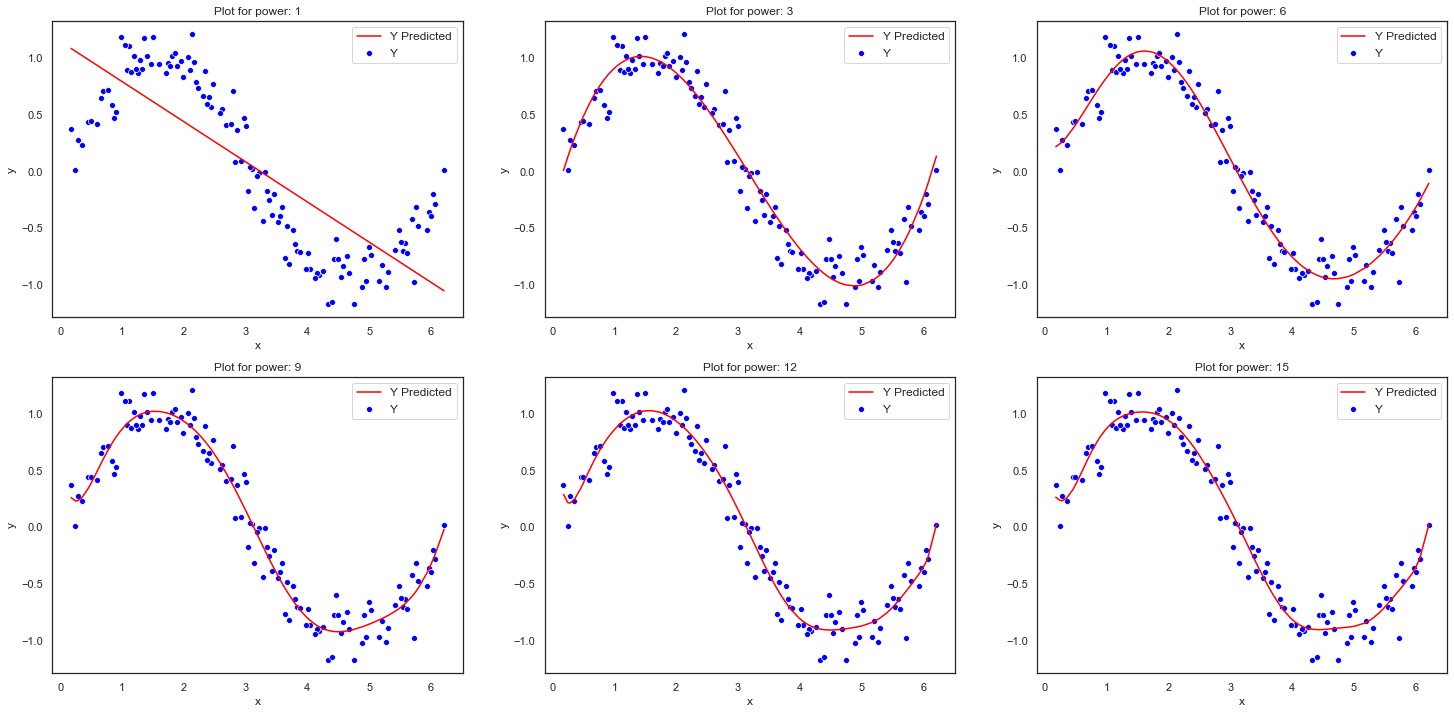

In [389]:
# Visualize the result
fig, axes = plt.subplots(2,3,figsize=(25, 12), sharex=False, sharey=False)
models_to_plot = [1,3,6,9,12,15]
# Iterate through all powers and assimilate results
for power, ax in zip(models_to_plot, axes.flatten()):
    itr_x_train = x_train.iloc[:,0:power]
    visualize_linear_regression(itr_x_train,y_train,y_pred_simple[power-1],power,ax)

## Ridge Regression

In [390]:
# Ridge Regression
from sklearn.linear_model import Ridge
def ridge_regression(x_features,y_target,alpha,power):
    # initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x^%d'%i for i in range(2,power+1)])

    # Fit the model
    ridgereg = Ridge(alpha=alpha)
    ridgereg.fit(x_features[predictors],y_target['y'])
    y_pred = pd.DataFrame()
    y_pred['y'] = ridgereg.predict(x_features[predictors])

    return ridgereg,y_pred

In [391]:
# Set the different values of alpha to be tested
alpha_ridge = [1e-10, 1e-5, 0, 1, 1e+1, 1e+5, 1e+10, 1e+20, 1e+27]

# Initialize a dataframe to store the results:
col = ['r2','mae','mse','intercept'] + ['coef_x^%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,9)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)
y_pred_ridge = []

In [392]:
# Apply Ridge Regression for all the 15 variables
# Iterate through all alpha and assimilate results
for i in range(0,9):
    ridgereg, y_pred = ridge_regression(x_train,y_train,alpha_ridge[i],15)
    y_pred_ridge.append(y_pred)
    coef_matrix_ridge.iloc[i,0:3] = performance_metrics(y_train,y_pred)
    coef_matrix_ridge.iloc[i,3:4] =[ridgereg.intercept_]
    coef_matrix_ridge.iloc[i,4:19] =ridgereg.coef_

In [393]:
# Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,r2,mae,mse,intercept,coef_x^1,coef_x^2,coef_x^3,coef_x^4,coef_x^5,coef_x^6,coef_x^7,coef_x^8,coef_x^9,coef_x^10,coef_x^11,coef_x^12,coef_x^13,coef_x^14,coef_x^15
alpha_1e-10,0.96138,0.11170,0.02076,5.3,-68,3.6e+02,-1e+03,1.8e+03,-2.1e+03,1.7e+03,-9.9e+02,4.2e+02,-1.3e+02,30,-4.9,0.56,-0.043,0.002,-4.2e-05
alpha_1e-05,0.96021,0.11353,0.02139,0.61,-3.2,8.2,-4.4,-3.6,3.4,3.1,-6.6,5,-2.2,0.65,-0.13,0.017,-0.0015,7.6e-05,-1.7e-06
alpha_0,0.96138,0.11169,0.02076,5.4,-69,3.7e+02,-1e+03,1.8e+03,-2.1e+03,1.7e+03,-1e+03,4.3e+02,-1.3e+02,30,-4.9,0.57,-0.044,0.002,-4.2e-05
alpha_1,0.95834,0.11492,0.02240,0.25,0.26,0.25,0.13,-0.0019,-0.084,-0.062,0.028,0.048,-0.041,0.013,-0.0019,-4.5e-07,3.4e-05,-4e-06,1.6e-07
alpha_10,0.95247,0.12256,0.02555,0.45,0.089,0.11,0.089,0.05,0.00073,-0.036,-0.031,0.012,0.028,-0.025,0.0097,-0.0021,0.00026,-1.8e-05,5.1e-07
alpha_1e+05,0.91907,0.15691,0.04350,0.81,4.8e-05,9.3e-05,0.00015,0.00023,0.00031,0.00036,0.00029,2.7e-05,-0.00033,-0.0003,0.00038,-0.00014,2.6e-05,-2.4e-06,8.4e-08
alpha_1e+10,0.85232,0.23612,0.07938,0.66,-8e-10,-4.5e-09,-1.7e-08,-5.7e-08,-1.8e-07,-5e-07,-1.3e-06,-3.1e-06,-6.1e-06,-9.1e-06,-6.2e-06,6.8e-06,-1.8e-06,2.1e-07,-8.4e-09
alpha_1e+20,0.17385,0.58793,0.44409,0.14,-8.9e-19,-5.2e-18,-2.5e-17,-1.2e-16,-5.3e-16,-2.4e-15,-1.1e-14,-5e-14,-2.2e-13,-9.7e-13,-4.1e-12,-1.7e-11,-6e-11,-1.6e-10,2.7e-11
alpha_1e+27,0.00019,0.66410,0.53744,0.031,-1.2e-25,-7.6e-25,-4.1e-24,-2.1e-23,-1.1e-22,-5.6e-22,-2.9e-21,-1.6e-20,-8.5e-20,-4.6e-19,-2.5e-18,-1.4e-17,-7.8e-17,-4.4e-16,-2.5e-15


In [394]:
# determining the number of zeros in each row of the coefficients data set:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-10    0
alpha_1e-05    0
alpha_0        0
alpha_1        0
alpha_10       0
alpha_1e+05    0
alpha_1e+10    0
alpha_1e+20    0
alpha_1e+27    0
dtype: int64

In [395]:
# Visualize Ridge Regression result
def visualize_ridge_regression(x_features,y_target,y_pred,alpha,axs):
    # Draw the data points
    sns.scatterplot(x=x_features['x'], y=y_target['y'], label='Y', color="blue", ax=axs)
    # Draw the prediction line
    sns.lineplot(x=x_features['x'], y=y_pred['y'], label='Y Predicted', color="red", ax=axs)
    axs.set(title='Plot for alpha: %.2g'%alpha);
    axs.legend(loc='upper right', fontsize='large')

In [396]:
# Ridge Regression for a specific alpha
def ridge_regression_alpha(p_x_train,p_y_train,p_alpha,p_power,p_axs):

    ridgereg, ridge_pred = ridge_regression(p_x_train,p_y_train,p_alpha,p_power)
    visualize_ridge_regression(p_x_train,p_y_train,ridge_pred,p_alpha,p_axs)

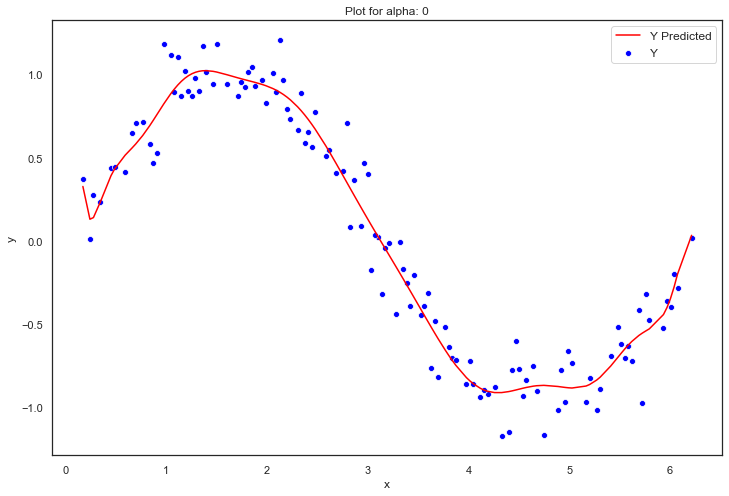

In [397]:
# Ridge Regression, alpha = 0
fig, axes = plt.subplots(figsize=(12,8), sharex=False, sharey=False)
alpha = 0
ridge_regression_alpha(x_train,y_train,alpha,15,axes)

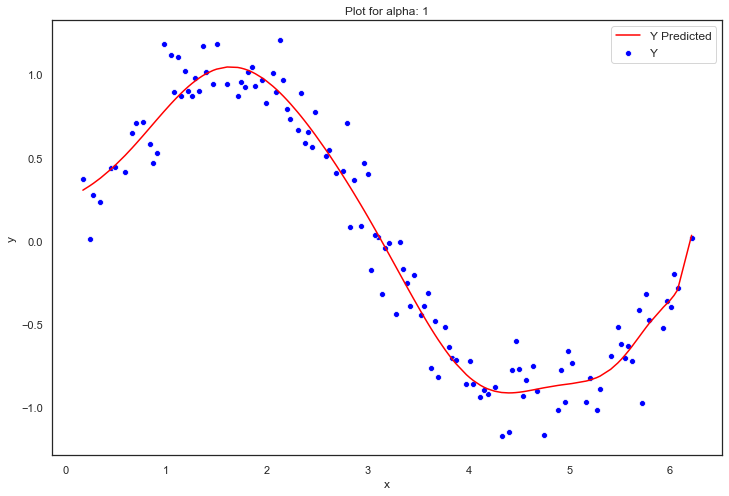

In [398]:
# Ridge Regression, alpha = 1
fig, axes = plt.subplots(figsize=(12,8), sharex=False, sharey=False)
alpha = 1
ridge_regression_alpha(x_train,y_train,alpha,15,axes)

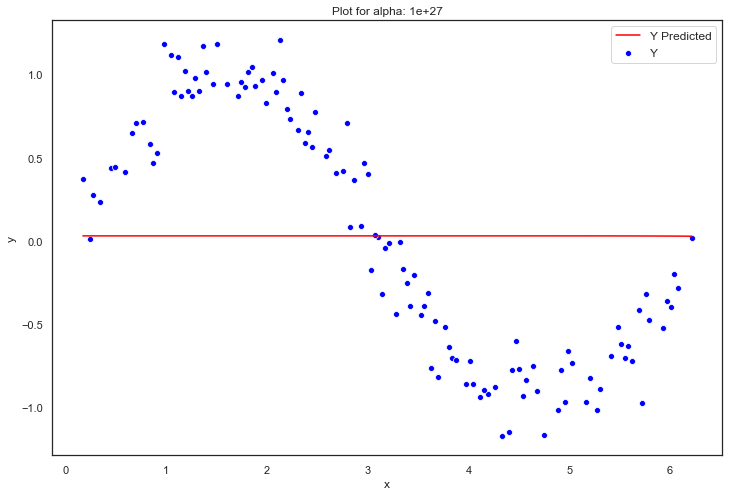

In [399]:
# Ridge Regression, alpha = 1e+27
fig, axes = plt.subplots(figsize=(12,8), sharex=False, sharey=False)
alpha = 1e+27
ridge_regression_alpha(x_train,y_train,alpha,15,axes)

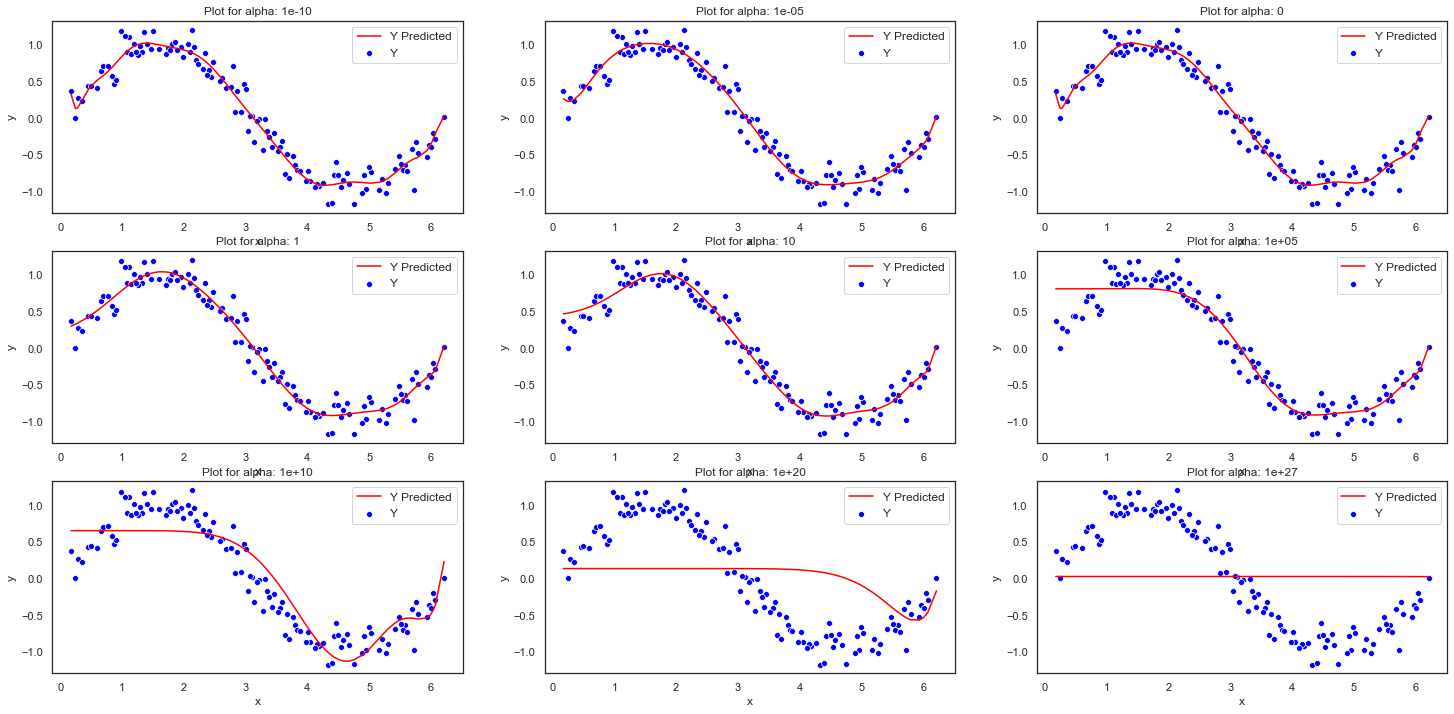

In [400]:
# Visualize the result
fig, axes = plt.subplots(3,3,figsize=(25, 12), sharex=False, sharey=False)
# Iterate through all powers and assimilate results
for i, ax in zip(range(9), axes.flatten()):
    ridge_regression_alpha(x_train,y_train,alpha_ridge[i],15,ax)

In [401]:
# determining the number of zeros in each row of the coefficients data set:
coef_matrix_ridge.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-10    0
alpha_1e-05    0
alpha_0        0
alpha_1        0
alpha_10       0
alpha_1e+05    0
alpha_1e+10    0
alpha_1e+20    0
alpha_1e+27    0
dtype: int64

## Lasso Regression

In [402]:
# Lasso Regression
from sklearn.linear_model import Lasso
def lasso_regression(x_features,y_target,alpha,power):
    # initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x^%d'%i for i in range(2,power+1)])

    # Fit the model
    lassoreg = Lasso(alpha=alpha)
    lassoreg.fit(x_features[predictors],y_target['y'])
    y_pred = pd.DataFrame()
    y_pred['y'] = lassoreg.predict(x_features[predictors])

    return lassoreg,y_pred

In [403]:
# Set the different values of alpha to be tested
alpha_lasso = [1e-10, 1e-5, 0, 1, 1e+1, 1e+5, 1e+10, 1e+20, 1e+27]

# Initialize a dataframe to store the results:
col = ['r2','mae','mse','intercept'] + ['coef_x^%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,9)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)
y_pred_lasso = []

In [404]:
# Apply Lasso Regression for all the 15 variables
# Iterate through all alpha and assimilate results
for i in range(0,9):
    lassoreg, y_pred = lasso_regression(x_train,y_train,alpha_lasso[i],15)
    y_pred_lasso.append(y_pred)
    coef_matrix_lasso.iloc[i,0:3] = performance_metrics(y_train,y_pred)
    coef_matrix_lasso.iloc[i,3:4] =[lassoreg.intercept_]
    coef_matrix_lasso.iloc[i,4:19] =lassoreg.coef_

In [405]:
# Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_lasso

,r2,mae,mse,intercept,coef_x^1,coef_x^2,coef_x^3,coef_x^4,coef_x^5,coef_x^6,coef_x^7,coef_x^8,coef_x^9,coef_x^10,coef_x^11,coef_x^12,coef_x^13,coef_x^14,coef_x^15
alpha_1e-10,0.95013,0.12468,0.02681,-0.064,1.4,-0.52,0.0035,0.0037,0.0005,4.7e-05,2.8e-06,-7.6e-08,-5.8e-08,-1.2e-08,-1.8e-09,-2.2e-10,-1.9e-11,-1.1e-13,4.8e-13
alpha_1e-05,0.95012,0.12469,0.02681,-0.064,1.4,-0.52,0.0035,0.0037,0.0005,4.7e-05,2.8e-06,-7.6e-08,-5.8e-08,-1.2e-08,-1.8e-09,-2.2e-10,-1.9e-11,-1.1e-13,4.8e-13
alpha_0,0.95013,0.12468,0.02681,-0.064,1.4,-0.52,0.0035,0.0037,0.0005,4.7e-05,2.8e-06,-7.6e-08,-5.8e-08,-1.2e-08,-1.8e-09,-2.2e-10,-1.9e-11,-1.1e-13,4.8e-13
alpha_1,0.88524,0.20266,0.06169,0.83,0,-0,-0,-0.011,0.00021,0.00019,1.6e-05,1e-06,2.6e-08,-8.8e-09,-2.4e-09,-4.2e-10,-6.1e-11,-7.6e-12,-7.4e-13
alpha_10,0.85806,0.23463,0.07630,0.71,-0,-0,-0,-0,-0.0024,3.4e-05,4.9e-05,3.7e-06,2.4e-07,4.8e-09,-2.3e-09,-6.3e-10,-1.2e-10,-1.8e-11,-2.7e-12
alpha_1e+05,0.35718,0.51341,0.34554,0.26,-0,-0,-0,-0,-0,-0,-0,-0,-0,-1.8e-07,-8.6e-09,3.4e-09,4.4e-10,1.8e-11,-3.1e-12
alpha_1e+10,0.03636,0.64625,0.51799,0.059,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-6.5e-13
alpha_1e+20,0.00000,0.66420,0.53754,0.03,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_1e+27,0.00000,0.66420,0.53754,0.03,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


In [406]:
# determining the number of zeros in each row of the coefficients data set:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-10     0
alpha_1e-05     0
alpha_0         0
alpha_1         3
alpha_10        4
alpha_1e+05     9
alpha_1e+10    14
alpha_1e+20    15
alpha_1e+27    15
dtype: int64

In [407]:
# Visualize Lasso Regression result
def visualize_lasso_regression(x_features,y_target,y_pred,alpha,axs):
    # Draw the data points
    sns.scatterplot(x=x_features['x'], y=y_target['y'], label='Y', color="blue", ax=axs)
    # Draw the prediction line
    sns.lineplot(x=x_features['x'], y=y_pred['y'], label='Y Predicted', color="red", ax=axs)
    axs.set(title='Plot for alpha: %.2g'%alpha);
    axs.legend(loc='upper right', fontsize='large')

In [408]:
# Lasso Regression for a specific alpha
def lasso_regression_alpha(p_x_train,p_y_train,p_alpha,p_power,p_axs):

    lassoreg, lasso_pred = lasso_regression(p_x_train,p_y_train,p_alpha,p_power)
    visualize_lasso_regression(p_x_train,p_y_train,lasso_pred,p_alpha,p_axs)

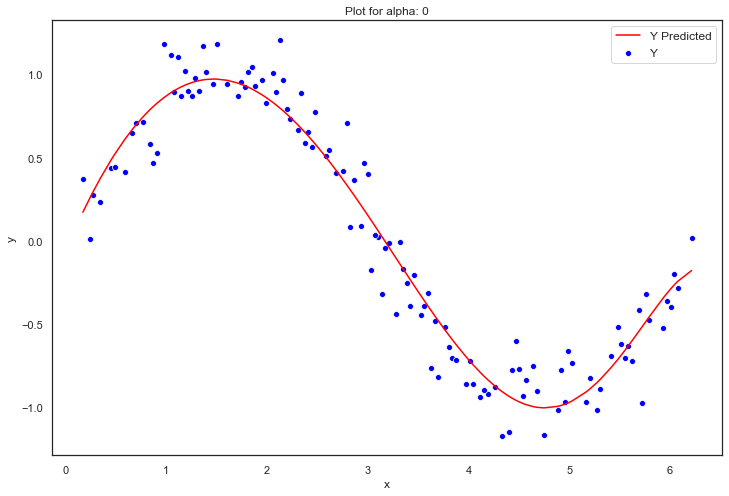

In [409]:
# Lasso Regression, alpha = 0
fig, axes = plt.subplots(figsize=(12,8), sharex=False, sharey=False)
alpha = 0
lasso_regression_alpha(x_train,y_train,alpha,15,axes)

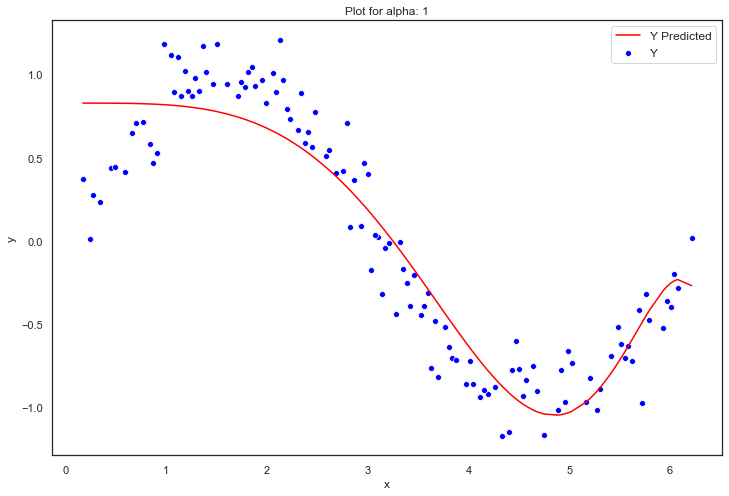

In [410]:
# Lasso Regression, alpha = 1
fig, axes = plt.subplots(figsize=(12,8), sharex=False, sharey=False)
alpha = 1
lasso_regression_alpha(x_train,y_train,alpha,15,axes)

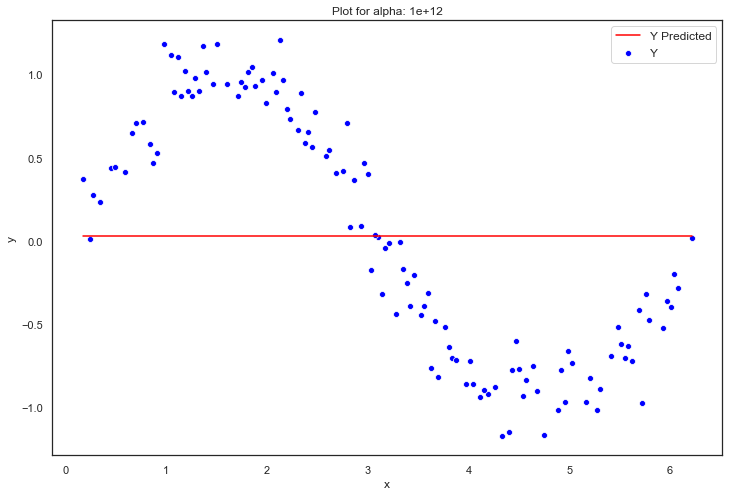

In [411]:
# Lasso Regression, alpha = 1e+12
fig, axes = plt.subplots(figsize=(12,8), sharex=False, sharey=False)
alpha = 1e+12
lasso_regression_alpha(x_train,y_train,alpha,15,axes)

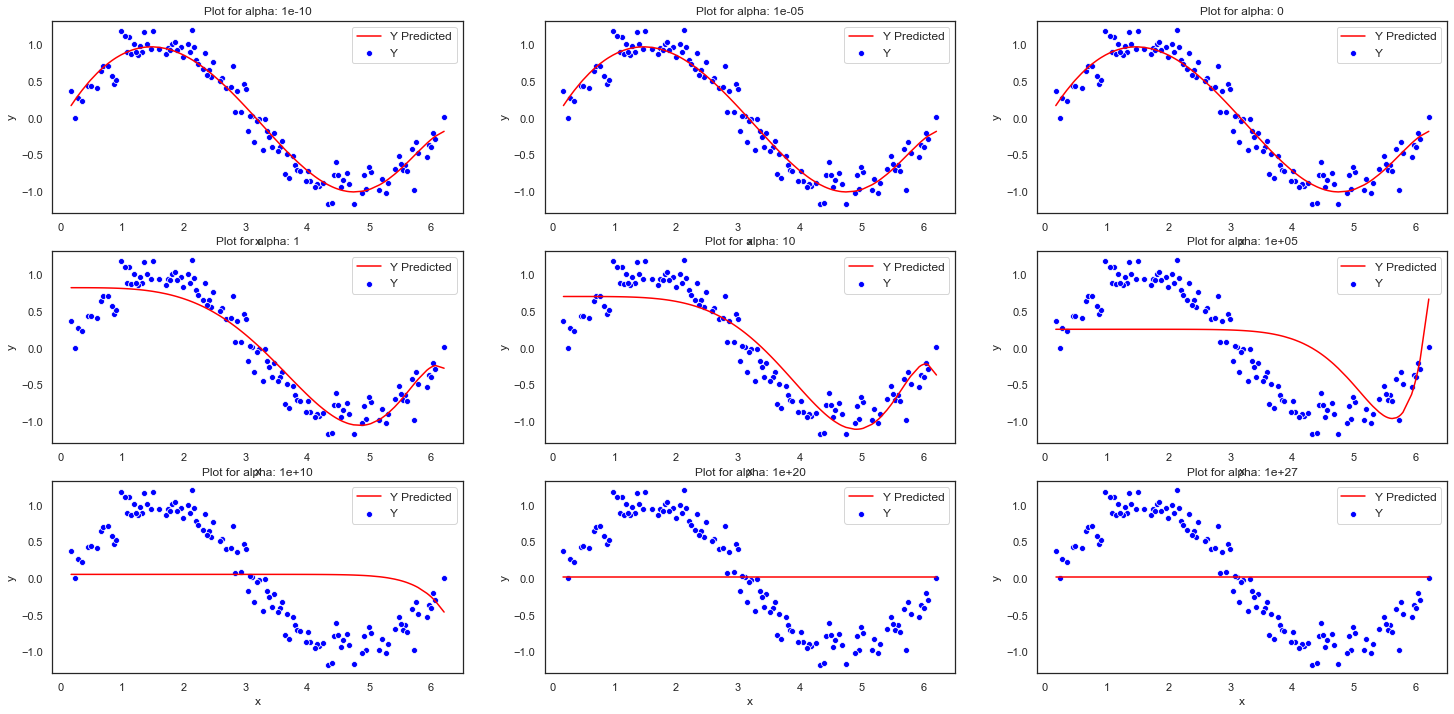

In [412]:
# Visualize the result
fig, axes = plt.subplots(3,3,figsize=(25, 12), sharex=False, sharey=False)
# Iterate through all powers and assimilate results
for i, ax in zip(range(9), axes.flatten()):
    lasso_regression_alpha(x_train,y_train,alpha_lasso[i],15,ax)

## Elastic Net Regression

In [413]:
# ElasticNet Regression
from sklearn.linear_model import ElasticNet
def elasticnet_regression(x_features,y_target,alpha,power):
    # initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x^%d'%i for i in range(2,power+1)])

    # Fit the model
    elasticreg = ElasticNet(alpha=alpha)
    elasticreg.fit(x_features[predictors],y_target['y'])
    y_pred = pd.DataFrame()
    y_pred['y'] = elasticreg.predict(x_features[predictors])

    return elasticreg,y_pred

In [414]:
# Set the different values of alpha to be tested
alpha_elastic = [1e-10, 1e-5, 0, 1, 1e+1, 1e+5, 1e+10, 1e+20, 1e+27]

# Initialize a dataframe to store the results:
col = ['r2','mae','mse','intercept'] + ['coef_x^%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_elastic[i] for i in range(0,9)]
coef_matrix_elastic = pd.DataFrame(index=ind, columns=col)
y_pred_elastic = []

In [415]:
# Apply ElasticNet Regression for all the 15 variables
# Iterate through all alpha and assimilate results
for i in range(0,9):
    elasticreg, y_pred = elasticnet_regression(x_train,y_train,alpha_elastic[i],15)
    y_pred_elastic.append(y_pred)
    coef_matrix_elastic.iloc[i,0:3] = performance_metrics(y_train,y_pred)
    coef_matrix_elastic.iloc[i,3:4] =[elasticreg.intercept_]
    coef_matrix_elastic.iloc[i,4:19] =elasticreg.coef_

In [416]:
# Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_elastic

,r2,mae,mse,intercept,coef_x^1,coef_x^2,coef_x^3,coef_x^4,coef_x^5,coef_x^6,coef_x^7,coef_x^8,coef_x^9,coef_x^10,coef_x^11,coef_x^12,coef_x^13,coef_x^14,coef_x^15
alpha_1e-10,0.95013,0.12468,0.02681,-0.064,1.4,-0.52,0.0035,0.0037,0.0005,4.7e-05,2.8e-06,-7.6e-08,-5.8e-08,-1.2e-08,-1.8e-09,-2.2e-10,-1.9e-11,-1.1e-13,4.8e-13
alpha_1e-05,0.95012,0.12469,0.02681,-0.064,1.4,-0.52,0.0035,0.0037,0.0005,4.7e-05,2.8e-06,-7.6e-08,-5.8e-08,-1.2e-08,-1.8e-09,-2.2e-10,-1.9e-11,-1.1e-13,4.8e-13
alpha_0,0.95013,0.12468,0.02681,-0.064,1.4,-0.52,0.0035,0.0037,0.0005,4.7e-05,2.8e-06,-7.6e-08,-5.8e-08,-1.2e-08,-1.8e-09,-2.2e-10,-1.9e-11,-1.1e-13,4.8e-13
alpha_1,0.88435,0.20365,0.06217,0.83,0,-0,-0.0028,-0.011,0.00058,0.00015,1.3e-05,9.2e-07,2.7e-08,-7.1e-09,-2e-09,-3.6e-10,-5.4e-11,-6.8e-12,-6.8e-13
alpha_10,0.86502,0.22834,0.07256,0.73,-0,-0,-0,-0.0023,-0.002,0.00015,3.4e-05,2.6e-06,1.5e-07,-3.5e-10,-2.3e-09,-5.3e-10,-9.2e-11,-1.4e-11,-1.8e-12
alpha_1e+05,0.37793,0.50351,0.33439,0.27,-0,-0,-0,-0,-0,-0,-0,-0,-0,-2.7e-07,7.1e-09,4.9e-09,3.3e-10,4.9e-12,-4.8e-12
alpha_1e+10,0.04519,0.64203,0.51325,0.074,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-9.6e-13
alpha_1e+20,0.00000,0.66420,0.53754,0.03,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_1e+27,0.00000,0.66420,0.53754,0.03,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


In [417]:
# determining the number of zeros in each row of the coefficients data set:
coef_matrix_elastic.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-10     0
alpha_1e-05     0
alpha_0         0
alpha_1         2
alpha_10        3
alpha_1e+05     9
alpha_1e+10    14
alpha_1e+20    15
alpha_1e+27    15
dtype: int64

In [418]:
# Visualize Lasso Regression result
def visualize_elasticnet_regression(x_features,y_target,y_pred,alpha,axs):
    # Draw the data points
    sns.scatterplot(x=x_features['x'], y=y_target['y'], label='Y', color="blue", ax=axs)
    # Draw the prediction line
    sns.lineplot(x=x_features['x'], y=y_pred['y'], label='Y Predicted', color="red", ax=axs)
    axs.set(title='Plot for alpha: %.2g'%alpha);
    axs.legend(loc='upper right', fontsize='large')

In [419]:
# ElasticNet Regression for a specific alpha
def elasticnet_regression_alpha(p_x_train,p_y_train,p_alpha,p_power,p_axs):

    elasticreg, elastic_pred = elasticnet_regression(p_x_train,p_y_train,p_alpha,p_power)
    visualize_elasticnet_regression(p_x_train,p_y_train,elastic_pred,p_alpha,p_axs)

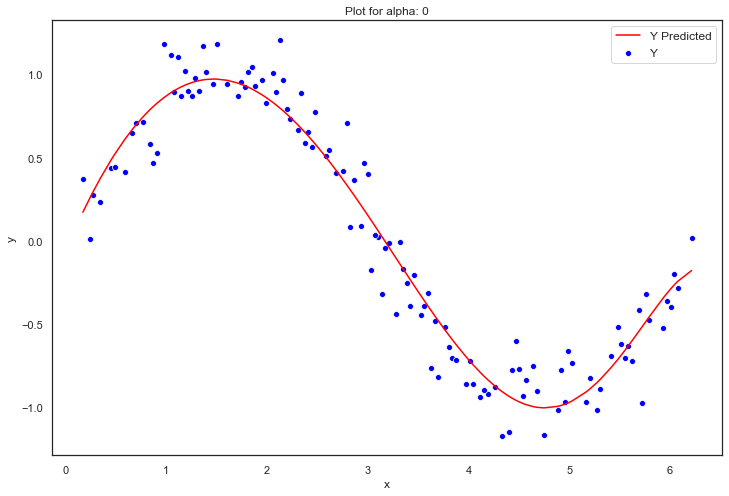

In [420]:
# ElasticNet Regression, alpha = 0
fig, axes = plt.subplots(figsize=(12,8), sharex=False, sharey=False)
alpha = 0
elasticnet_regression_alpha(x_train,y_train,alpha,15,axes)

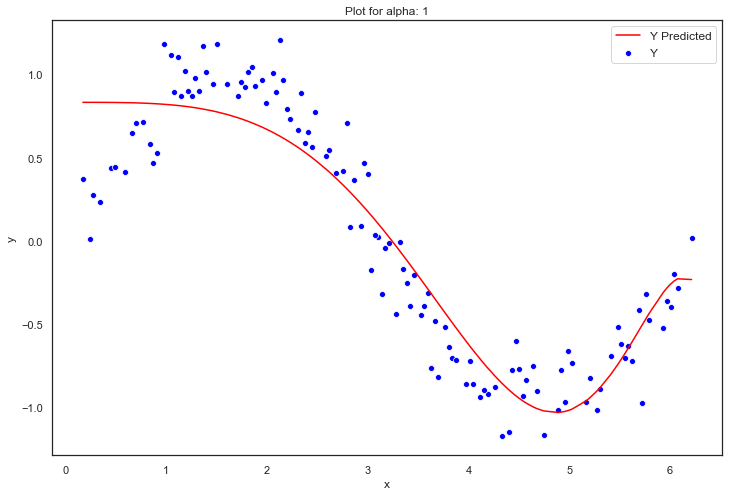

In [421]:
# ElasticNet Regression, alpha = 1
fig, axes = plt.subplots(figsize=(12,8), sharex=False, sharey=False)
alpha = 1
elasticnet_regression_alpha(x_train,y_train,alpha,15,axes)

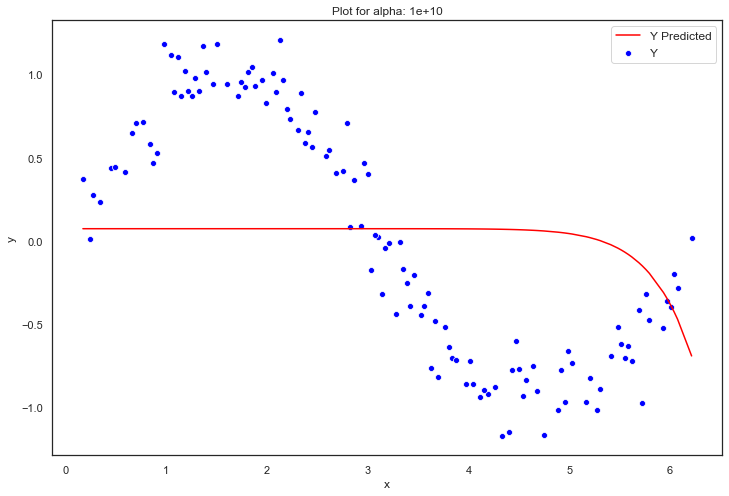

In [422]:
# ElasticNet Regression, alpha = 1e+10
fig, axes = plt.subplots(figsize=(12,8), sharex=False, sharey=False)
alpha = 1e+10
elasticnet_regression_alpha(x_train,y_train,alpha,15,axes)

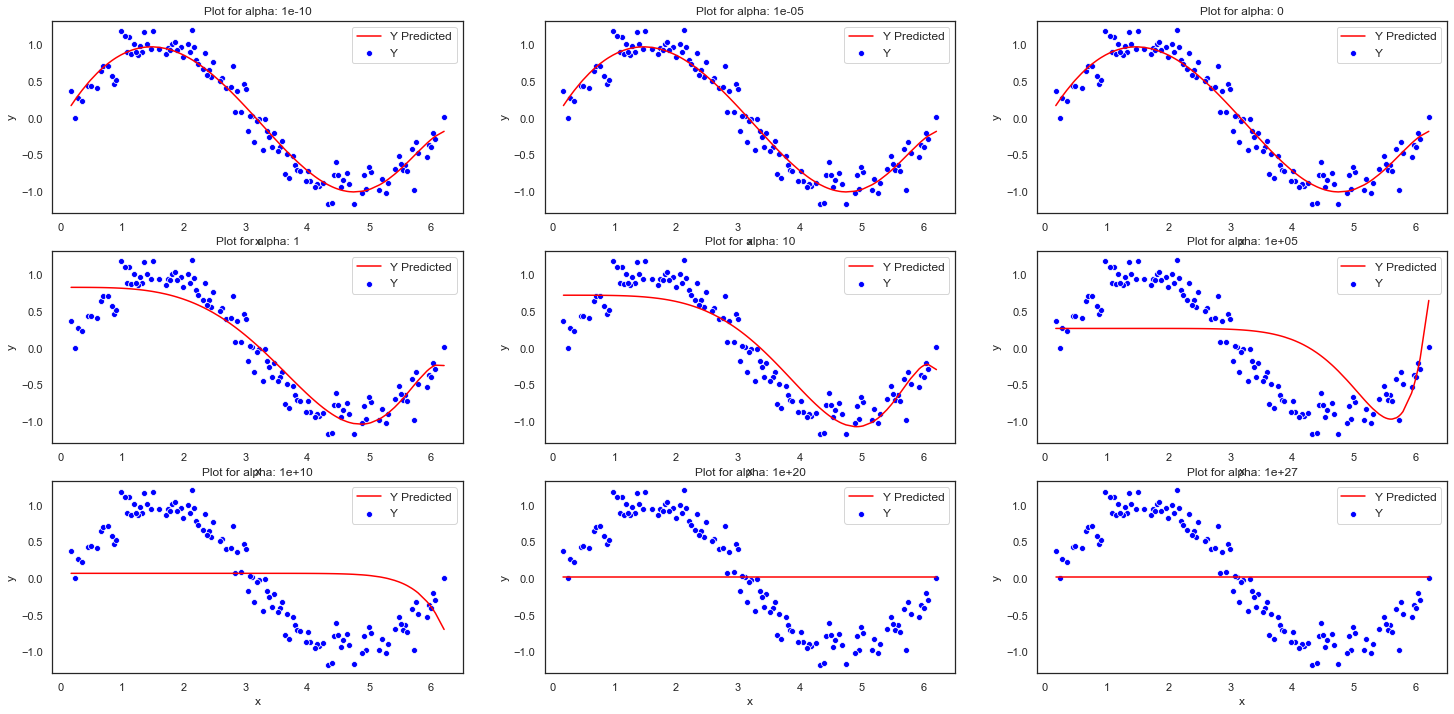

In [423]:
# Visualize the result
fig, axes = plt.subplots(3,3,figsize=(25, 12), sharex=False, sharey=False)
# Iterate through all powers and assimilate results
for i, ax in zip(range(9), axes.flatten()):
    elasticnet_regression_alpha(x_train,y_train,alpha_elastic[i],15,ax)

## Ridge Cross validation

In [424]:
# Ridge Regression with cross-validation
from sklearn.linear_model import RidgeCV
def ridge_regression_cv(p_x_train,p_y_train,p_power,p_axs):

    predictors=['x']
    if power>=2:
        predictors.extend(['x^%d'%i for i in range(2,power+1)])

    # generate an array of alpha values ranging from very big to very small
    alphas = 10**np.linspace(20,-20,1000)*0.5
    # Fit the CV model
    ridgecv = RidgeCV(alphas=alphas)
    ridgecv.fit(p_x_train[predictors],p_y_train['y'])
    # Fit the Ridge model with optimal alpha obtained from CV
    ridgereg, ridge_pred = ridge_regression(p_x_train,p_y_train,ridgecv.alpha_,p_power)
    visualize_ridge_regression(p_x_train,p_y_train,ridge_pred,ridgecv.alpha_,p_axs)

    return performance_metrics(p_y_train,ridge_pred)

['0.95975', '0.11424', '0.02164']

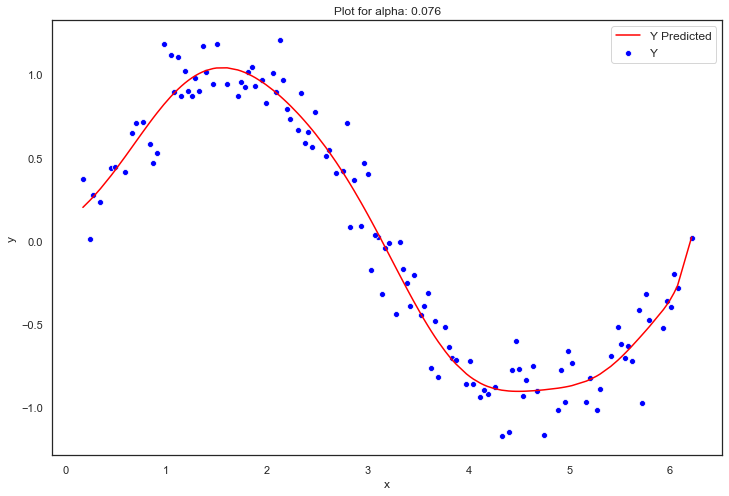

In [425]:
# Ridge Regression with cross-validation
fig, axes = plt.subplots(figsize=(12,8), sharex=False, sharey=False)
ridge_regression_cv(x_train,y_train,15,axes)

## Lasso Cross validation

In [426]:
# Lasso Regression with cross-validation
from sklearn.linear_model import LassoCV
def lasso_regression_cv(p_x_train,p_y_train,p_power,p_axs):

    predictors=['x']
    if power>=2:
        predictors.extend(['x^%d'%i for i in range(2,power+1)])

    # generate an array of alpha values ranging from very big to very small
    alphas = 10**np.linspace(20,-20,1000)*0.5
    # Fit the CV model
    lassocv = LassoCV(alphas=alphas)
    lassocv.fit(p_x_train[predictors],p_y_train['y'])
    # Fit the Lasso model with optimal alpha obtained from CV
    lassoreg, lasso_pred = lasso_regression(p_x_train,p_y_train,lassocv.alpha_,p_power)
    visualize_lasso_regression(p_x_train,p_y_train,lasso_pred,lassocv.alpha_,p_axs)

    return performance_metrics(p_y_train,lasso_pred)

['0.95013', '0.12468', '0.02681']

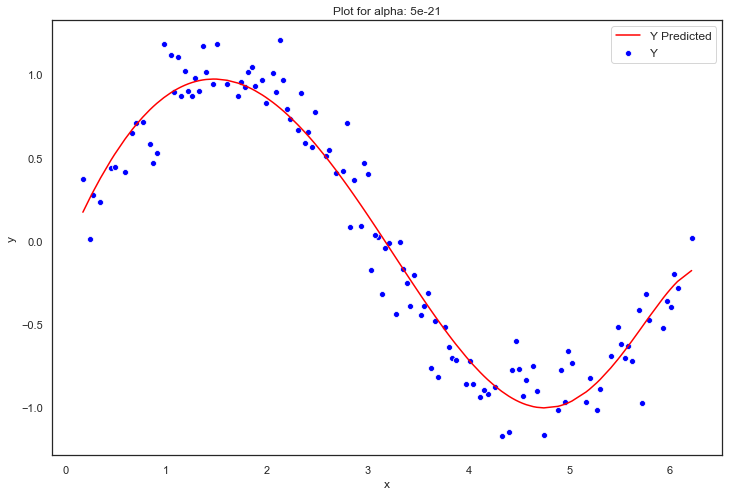

In [427]:
# Lasso Regression with cross-validation
fig, axes = plt.subplots(figsize=(12,8), sharex=False, sharey=False)
lasso_regression_cv(x_train,y_train,15,axes)

## ElasticNet Cross validation

In [428]:
# Elasticnet Regression with cross-validation
from sklearn.linear_model import ElasticNetCV
def elasticnet_regression_cv(p_x_train,p_y_train,p_power,p_axs):

    predictors=['x']
    if power>=2:
        predictors.extend(['x^%d'%i for i in range(2,power+1)])

    # generate an array of alpha values ranging from very big to very small
    alphas = 10**np.linspace(20,-20,1000)*0.5
    # Fit the CV model
    elasticcv = ElasticNetCV(alphas=alphas)
    elasticcv.fit(p_x_train[predictors],p_y_train['y'])
    # Fit the Lasso model with optimal alpha obtained from CV
    elasticreg, elastic_pred = elasticnet_regression(p_x_train,p_y_train,elasticcv.alpha_,p_power)
    visualize_elasticnet_regression(p_x_train,p_y_train,elastic_pred,elasticcv.alpha_,p_axs)

    return performance_metrics(p_y_train,elastic_pred)

['0.95013', '0.12468', '0.02681']

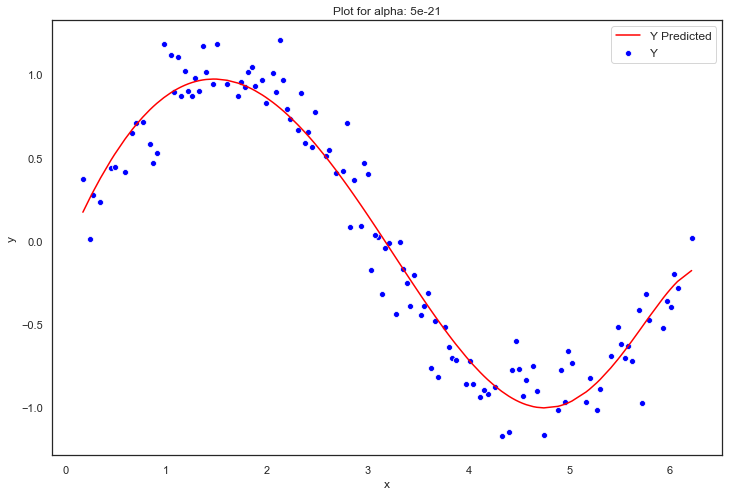

In [429]:
# Elasticnet Regression with cross-validation
fig, axes = plt.subplots(figsize=(12,8), sharex=False, sharey=False)
elasticnet_regression_cv(x_train,y_train,15,axes)